# Import Libraries

In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import seaborn as sns

# 1) Load Data/Create Datetime Index

In [2]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv'
df = pd.read_csv(url)
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


# Convert date column to datetime dtype

In [3]:
# CORRECT - properly recognizes dates and does not interpret them as seconds
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

# Set 'date' column as the index

In [4]:
df = df.set_index('date')

In [5]:
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

#### - Freq = None, and datetype is now datetime

# Filter only the required data:

- Keep only data from the year 2000 or later.
- Keep only the following features:
  - precipitation
  - mean_temp
  - min_temp
  - max_temp
  - snow_depth

In [6]:
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 
                      'max_temp', 'snow_depth']]

df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


# Impute missing values

- Think about each feature and what imputation method makes sense. 

- You may not be able to use the same method for every feature!

In [7]:
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [8]:
df.isna().sum().sum()

3337

In [9]:
# interpolate temperature measures
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()

In [10]:
df.isna().sum()

precipitation     390
mean_temp           0
min_temp            0
max_temp            0
snow_depth       1752
dtype: int64

In [11]:
# fill preciptation/snow with 0
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

In [12]:
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# 2) Answer the Questions with Visualizations (Using the Correct Frequency)

## Q1: What month had the most precipitation between 2000 through 2010?
- Resample the data as Monthly frequency.
- Find the date and corresponding value for the max precipitation.
- Plot the feature and time period that corresponds to the question.
- Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the most precipitation (the max precipitation).
- Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
- Make sure to add a legend so that your label is visible.

In [13]:
q1 = df['precipitation'].copy()
q1.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=7671, freq=None)

In [14]:
# create a filter to distinguish data between 2000 through 2010
date_filter = q1.index <= '2010-12-31'

In [15]:
# apply filter
q1 = q1 [date_filter]

In [16]:
# confirm filter is working
q1.tail()

date
2010-12-27    5.0
2010-12-28    0.4
2010-12-29    1.4
2010-12-30    0.0
2010-12-31    0.0
Name: precipitation, dtype: float64

In [17]:
# set frequency to monthly
q1 = q1.asfreq('MS')
#  preview the index again
q1.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2010-03-01', '2010-04-01', '2010-05-01', '2010-06-01',
               '2010-07-01', '2010-08-01', '2010-09-01', '2010-10-01',
               '2010-11-01', '2010-12-01'],
              dtype='datetime64[ns]', name='date', length=132, freq='MS')

In [18]:
q1.head()

date
2000-01-01    0.0
2000-02-01    9.8
2000-03-01    0.2
2000-04-01    0.6
2000-05-01    0.0
Freq: MS, Name: precipitation, dtype: float64

In [19]:
# Find date and corresponding value for max precipitation
max_date = q1.idxmax()
max_date

Timestamp('2003-01-01 00:00:00', freq='MS')

In [20]:
# Find the value for the max precipitation
q1[q1.index == '2003-01-01 00:00:00']

date
2003-01-01    16.0
Freq: MS, Name: precipitation, dtype: float64

In [21]:
q1.sort_values(ascending=False)

date
2003-01-01    16.0
2001-10-01    15.8
2008-11-01    13.6
2009-11-01    11.6
2010-10-01    10.4
              ... 
2007-09-01     0.0
2002-06-01     0.0
2007-11-01     0.0
2004-12-01     0.0
2000-01-01     0.0
Name: precipitation, Length: 132, dtype: float64

#### - Jan 1, 2003 had the most precipitation between 2000 through 2010, and the value of precipitation was 16 inches.

## Plot feature and time period

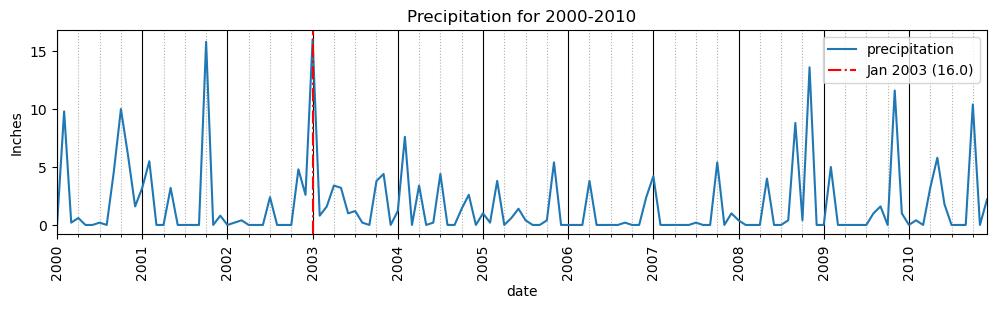

In [22]:
fig, ax = plt.subplots(figsize=(12,3))
q1.plot(ax = ax, title='Precipitation for 2000-2010', ylabel='Inches')
## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')
# Add a line for the max precipitation date and value
ax.axvline(max_date, color = 'red', ls ="-.", label=f'Jan 2003 ({q1.max()})')
ax.legend();

# Q2: Which year between 2000-2020 had the coolest average temperature?

- Resample the data as Yearly frequency.
- Plot the feature and time period that corresponds to the question.
  - Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the lowest mean temp.
- Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.

In [23]:
# create separate dataframe
q2 = df['mean_temp'].copy()

In [24]:
# filter data between 2000 through 2020
date_filter = q2.index <= '2020-12-31'

In [25]:
# apply filter
q2 = q2[date_filter]

In [26]:
q2.head()

date
2000-01-01    7.0
2000-01-02    7.9
2000-01-03    9.4
2000-01-04    7.0
2000-01-05    6.4
Name: mean_temp, dtype: float64

In [27]:
q2.tail()

date
2020-12-27    7.5
2020-12-28    1.1
2020-12-29    2.6
2020-12-30    2.7
2020-12-31   -0.8
Name: mean_temp, dtype: float64

In [28]:
# Resample data as 'Yearly' frequency.
q2_temp = q2.asfreq("Y")
q2_temp.head(5)

date
2000-12-31     2.8
2001-12-31     1.0
2002-12-31     7.3
2003-12-31     3.3
2004-12-31    10.6
Freq: A-DEC, Name: mean_temp, dtype: float64

In [29]:
# Q2 temp index
q2_temp.index

DatetimeIndex(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', name='date', freq='A-DEC')

## Plot the feature and time period

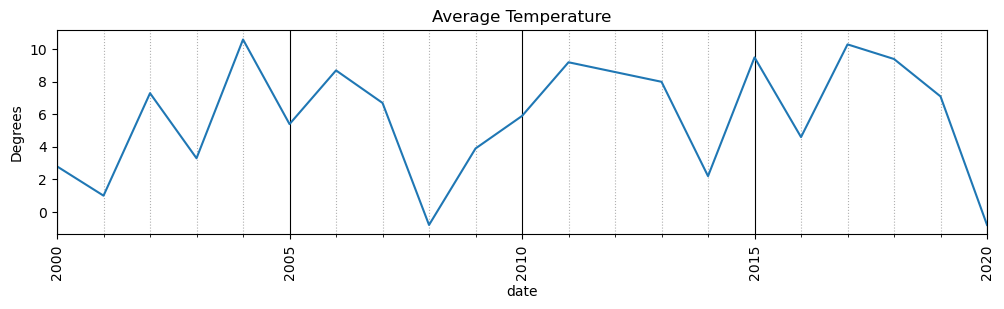

In [30]:
fig, ax = plt.subplots(figsize=(12,3))
q2_temp.plot(ax = ax, title='Average Temperature', ylabel='Degrees')
## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')

## Determine the date and value for the lowest mean temp

In [31]:
# Determine the date and value for the lowest mean temp.
min_date = q2_temp.idxmin()
min_date

Timestamp('2008-12-31 00:00:00', freq='A-DEC')

In [32]:
# Find value for max precipitation
q2_temp[q2_temp.index == '2008-12-31 00:00:00']

date
2008-12-31   -0.8
Freq: A-DEC, Name: mean_temp, dtype: float64

In [33]:
# sort values to confirm
q2_temp.sort_values(ascending=True)

date
2020-12-31    -0.8
2008-12-31    -0.8
2001-12-31     1.0
2014-12-31     2.2
2000-12-31     2.8
2003-12-31     3.3
2009-12-31     3.9
2016-12-31     4.6
2005-12-31     5.4
2010-12-31     5.9
2007-12-31     6.7
2019-12-31     7.1
2002-12-31     7.3
2013-12-31     8.0
2012-12-31     8.6
2006-12-31     8.7
2011-12-31     9.2
2018-12-31     9.4
2015-12-31     9.5
2017-12-31    10.3
2004-12-31    10.6
Name: mean_temp, dtype: float64

#### - The lowest temperature between years 2000 and 2020 was -0.8 degrees on 12/31/2008 AND on 12/31/2020

## Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.

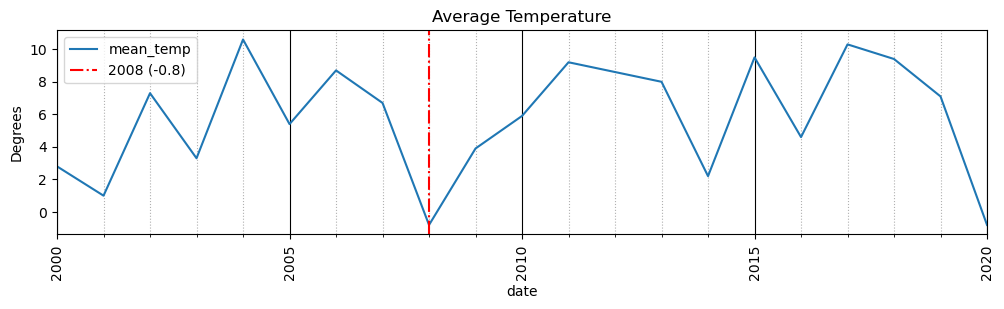

In [34]:
fig, ax = plt.subplots(figsize=(12,3))
q2_temp.plot(ax = ax, title='Average Temperature', ylabel='Degrees')
## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')

# Add a line for the max precipitation date and value
ax.axvline(min_date, color = 'red', ls ="-.", label=f'2008 ({q2_temp.min()})')
ax.legend();